# CSC8001: Assignment 2  (30%) [100 marks]

<img src="data/CitiBike_Logo_p.svg" width=225 height=100 align=left style="padding-right: 20px; padding-bottom: 20px;" />

New York City's Citi Bike program has 10,000 bikes and 600 stations across Manhattan, Brooklyn, Queens and Jersey City. It was designed for quick trips with convenience in mind, and provides a fun and affordable way for visitors and locals to get around New York City.

For this assignment, you will be analysing a dataset from the [**Citi Bike Trip Histories**](https://www.citibikenyc.com/system-data) data. The data file <sup>1</sup> is available in the assignments data folder on the course StudyDesk.  

As part of your analysis, you will be coding various functions. In addition to including the necessary code, be sure to **add useful comments** to your functions to explain what your code is doing and why.  Comments are most useful when they document non-obvious features of the code. It is reasonable to assume that the reader can figure out *what* the code does; it is more useful to explain *why*.  Comments were discussed in notebook *1.1 Intro Python 3*.

**Citi Bike Trip Histories** data includes:
- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station ID
- Start Station Name
- End Station Name
- End Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 7-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

<sup>1</sup>Citi bike data is provided according to the [NYCBS Data Use Policy](https://www.citibikenyc.com/data-sharing-policy).

In [5]:
# Load required modules for notebook
import pandas as pd
import numpy as np

from datetime import datetime
from dateutil import parser

# Display all plots inline using the
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

import os

## Load the data set   [5 marks]
Load the Citi Bike data set provided:
- Load the data set into a DataFrame called `rides`.  
- Set the `starttime` column as the index and remember to parse the dates.
- Rename the `usertype` column to `User Type`.

**NOTE**: The data set may take a few minutes to load.

In [10]:
## Load Citi Bike Tripdata 
rides = pd.read_csv("201507-citibike-tripdata.csv", low_memory=False)                        # without parse_dates

# Set Column Name
rides.columns = ['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude',
                 'end station id', 'end station name', 'end station latitude', 'end station longitude', 'bikeid', 'User Type', 'birth year', 'gender']

# Rename Column Name
rides.rename(columns={'usertype': 'User Type'})


# Set StartTime as index
rides.set_index('starttime')


,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,User Type,birth year,gender
starttime,,,,,,,,,,,,,,
7/1/2015 00:00:03,732,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
7/1/2015 00:00:06,322,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
7/1/2015 00:00:17,790,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
7/1/2015 00:00:23,1228,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
7/1/2015 00:00:44,1383,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1
7/1/2015 00:01:00,603,7/1/2015 00:11:04,455,1 Ave & E 44 St,40.750020,-73.969053,367,E 53 St & Lexington Ave,40.758281,-73.970694,17069,Subscriber,1953.0,1
7/1/2015 00:01:03,520,7/1/2015 00:09:43,458,11 Ave & W 27 St,40.751396,-74.005226,116,W 17 St & 8 Ave,40.741776,-74.001497,17043,Subscriber,1986.0,1
7/1/2015 00:01:06,289,7/1/2015 00:05:55,312,Allen St & E Houston St,40.722055,-73.989111,236,St Marks Pl & 2 Ave,40.728419,-73.987140,14967,Subscriber,1970.0,1
7/1/2015 00:01:25,1771,7/1/2015 00:30:57,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119,20171,Customer,NaN,0


## Exploring Data 
Let's get familiar with the data set by asking it some questions.  

### Most popular stations for all riders [5 marks]
Each ride starts and ends at a bike sharing station. What are the five (5) most popular stations to end a trip? <br>Function `a1()` should return a Series object indexed by station names in descending order of popularity.  

In [13]:
def a1(rides):
    """ YOUR CODE AND COMMENTS HERE """
    five_popular_station_end_trip = rides['end station name'].value_counts().head()
    return five_popular_station_end_trip

In [14]:
a1(rides)

8 Ave & W 31 St          11390
West St & Chambers St    11383
Pershing Square North    10861
Lafayette St & E 8 St    10357
E 17 St & Broadway       10108
Name: end station name, dtype: int64

### Most popular stations for Customers [5 marks]
What are the five (5) most popular destinations for Customers? <br>Function `a2()` should return a Series object indexed by station names in descending order of popularity.  

In [16]:
def a2(rides):
    """ YOUR CODE AND COMMENTS HERE """
    df1 = rides[rides['User Type'] == 'Customer']       # set df as Customer user type
    five_popular_station_customers = df1['end station name'].value_counts().head()  # count 5 most popular station name
    return five_popular_station_customers

In [17]:
a2(rides)

Central Park S & 6 Ave               6124
Centre St & Chambers St              4388
Grand Army Plaza & Central Park S    3821
West St & Chambers St                3786
Broadway & W 60 St                   3597
Name: end station name, dtype: int64

### Visiting Central Park [5 marks]
Central Park is a big draw for tourists.  How many *Customer* rides end at a **Central Park** bike sharing station?  <br>Function `a3()` should return a Series object indexed by station names in descending order of popularity. <br><br>NOTE: Many station names indicate that the station is located at the intersection of two streets: **E 17 St & Broadway** or **Broadway & E 14 St**.  Your answer should include any end station whose name contains *Central Park*. 

In [19]:
def a3(rides):
    """ YOUR CODE AND COMMENTS HERE """
    df1 = rides[rides['User Type'] == 'Customer']
    mask = df1['end station name'].str.contains('Central Park')     # mast end station name with Central park
    central_park_total_rides = df1.loc[mask, 'end station name'].value_counts()    # count total rides
    return central_park_total_rides

In [21]:
a3(rides)

Central Park S & 6 Ave               6124
Grand Army Plaza & Central Park S    3821
Name: end station name, dtype: int64

### Average trip duration for Subscribers [5 marks]
Many subscribers use the Citi Bikes to commute to work.  What is the mean trip duration for Subscribers on any workday (Monday - Friday)? <br>Function `a4()` should return the mean value (float to two decimals). 

In [24]:
def a4(rides):
    """ YOUR CODE AND COMMENTS HERE """
    rides['starttime'] = pd.to_datetime(rides['starttime'], infer_datetime_format=True)     # parse starttime object to datetime
      
    m = (rides['starttime'].dt.dayofweek < 5) & (rides['User Type'] == 'Subscriber')    # count rides between weekdays and user is Subscriber
    mean_trip_duration = round(rides.loc[m, 'tripduration'].mean(), 2)  # count mean value and round it to 2 digit

    return mean_trip_duration


In [25]:
a4(rides)

785.6

### Longest trip duration of any rider [5 marks]
What is the longest trip duration for any rider?  <br>Function a5() should return an integer. 

In [31]:
def a5(rides):
    """ YOUR CODE AND COMMENTS HERE """
    return rides['tripduration'].max()  # tripduration max value

In [32]:
a5(rides)

5174309

### What is the breakdown of the rides in our data set by user type? [5 marks]
How many of the rides in our data set are for Customers and how many for Subscribers? 
<br>Function `a6()` should return a Series object indexed by the rider type.

In [33]:
def a6(rides):
    """ YOUR CODE AND COMMENTS HERE """
    df1 = rides.groupby('User Type')  # group rides by Usaer Type
    return df1['User Type'].value_counts()  # Count values of Customers & Subscribers

In [34]:
a6(rides)

User Type   User Type 
Customer    Customer      180362
Subscriber  Subscriber    905314
Name: User Type, dtype: int64

## Weekday usage [10 marks]

Does Citi Bike rider usage vary by the day of the week?  Are there some day's of the week  which have more Citi Bike trips?  Is their a difference in usage between Customers and Subscribers? 

- Create a pandas DataFrame with the number of rides by User Type for each day of the week.  Use  `starttime` to determine the rides week day.  Your DataFrame should be similar to the one show below, but your data values will vary.

User Type<br>Week Day |	Customer<br>&nbsp; |	Subscriber<br>&nbsp;
---: | ---: | ---:
0  |	    1679  |	53569
1  |		1222  |		59323
2  |		1765  |		74118
3  |		1981  |		85190
4  |		5403  |		99728
5  |		7004  |	60580
6  |		5489  |		52427

In [41]:
def a7(rides):
    """ YOUR CODE AND COMMENTS HERE """
    rides['starttime'] = pd.to_datetime(rides['starttime'], infer_datetime_format=True)

    cats = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    days = pd.Categorical(rides.starttime.dt.strftime('%a'), categories=cats, ordered=True)

    df = rides

    df = rides.groupby([days, 'User Type']).size().unstack(fill_value=0)
    return df

In [42]:
a7(rides)

User Type,Customer,Subscriber
Mon,18802,128570
Tue,16321,135251
Wed,19647,169903
Thu,21514,161720
Fri,31043,152940
Sat,37099,76835
Sun,35936,80095


## Plotting weekday rider usage [10 marks]

Provide a plot which shows the weekday usage pattern by user type.  Include a plot line for All weekday rides.

Your plot should be similar to the example below but your values will vary.

<img src="data/plt-day_of_week.png" width=524 height=343 align=center style="padding-right: 20px; padding-bottom: 20px;" />

In [37]:
def a8(rides):
    """ YOUR CODE AND COMMENTS HERE """
    rides['starttime'] = pd.to_datetime(rides['starttime'], infer_datetime_format=True)

    cats = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    days = pd.Categorical(rides.starttime.dt.strftime('%a'), categories=cats, ordered=True)

    df = rides
    df = rides.groupby([days, 'User Type']).size().unstack(fill_value=0).assign(All=lambda x: x.sum(1))
    # Plot Graph
    y_label = 'Daily Rides by User Types'
    x_label = 'Days of the Week'
    title = 'Number of Rides by User Types and Week Day'
    ax = df.plot()
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    plt.show()
    

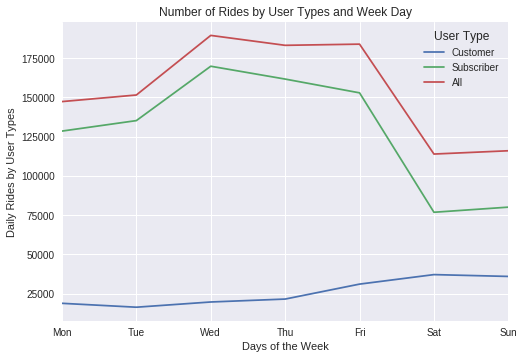

In [38]:
a8(rides)

## Time of day usage [10 marks]
What does the rider usage look like as a function of the time of day?  

- Create a pandas DataFrame with the number of rides by User Type for each hour of the day. Use starttime to determine each ride's hour. Your DataFrame should be similar to the one show below, but your data values will vary.

User Type<br>Hour |	Customer<br>&nbsp; |	Subscriber<br>&nbsp;
---: | ---: | ---:
0  | 	276  | 	4073
1  | 	202  | 	2460
2  | 	98  | 	1434
3  | 	64  | 	951
4  | 	54  | 	1010
5  | 	37  | 	3280
... | ... | ...


In [43]:
def a9(rides):
    """ YOUR CODE AND COMMENTS HERE """
    rides['starttime'] = pd.to_datetime(rides['starttime'], infer_datetime_format=True)
    df = pd.crosstab(rides.starttime.dt.hour, rides['User Type'])
    return df


In [44]:
a9(rides)

User Type,Customer,Subscriber
starttime,,
0,2464,9259
1,1377,5042
2,871,2882
3,597,1755
4,373,1691
5,444,5726
6,1098,22982
7,2094,45393
8,4159,78258


## Plotting time of day usage [10 marks]

Provide a plot which shows the time of day  usage pattern by user type.  Include a plot line for All hourly rides.

Your plot should be similar to the example below but your values will vary.

<img src="data/plt-hour_of_day.png" width=509 height=357 align=left style="padding-right: 20px; padding-bottom: 20px;" />

In [47]:
def a10(rides):
    """ YOUR CODE AND COMMENTS HERE """
    rides['starttime'] = pd.to_datetime(rides['starttime'], infer_datetime_format=True)
    cats = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM']
    dates = pd.Categorical(rides.starttime.dt.strftime('%I %p'), categories=cats, ordered=True)
    df = pd.crosstab(dates, rides['User Type']).assign(All=lambda x: x.sum(1))

    ax = df.plot()
    ax.set_ylabel('Hourly Rides by User Types')
    ax.set_xlabel('Hours of the Day')
    ax.set_title('Number of Rides by User Types and Hour')
    plt.show()

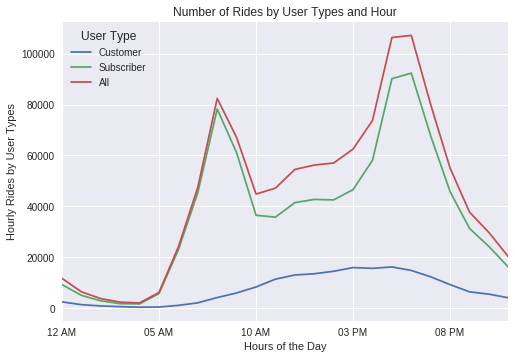

In [49]:
a10(rides)


## Workdays vs Weekends [15 marks]
Hourly traffic seems to be very bimodal for Subscribers.  It peaks around 8:00 in the morning and then again around 5:00 at night.

- Create a pandas DataFrame with the number of rides by  Hour and User Type for Workdays and Weekends. Use starttime to determine each ride's hour. Your DataFrame should be similar to the one show below, but your data values will vary.

&nbsp;<br>&nbsp; | User Type<br>Hour |	Customer<br>&nbsp; |	Subscriber<br>&nbsp;
---: | ---: | ---: | ---:
Weekday | 0  | 	124  | 	2194
&nbsp; | 1  | 	120  | 	1238
&nbsp; | 2  | 	53  | 	716
&nbsp; | 3  | 	30  | 	520
.... | .... | .... | ....
Weekend | 0  | 	152  | 	1879
&nbsp; | 1  | 	82  | 	1222
&nbsp; | 2  | 	45  | 	718
&nbsp; | 3  | 	34  | 	431
&nbsp; | 4  | 	29  | 	288
.... | .... | .... | ....


In [23]:
def a11():
    """ YOUR CODE AND COMMENTS HERE """


In [24]:
a11()

## Plotting workdays vs weekends [10 marks]

Provide a plot which shows the number of rides by Hour and User Type.  One plot for Workdays and the second for Weekends.
Include a plot line for All hourly rides.  Your plots should be similar to the example below but your values will vary.

<div style="float: left; "><img src="data/plt-weekday-rides.png" width=509 height=357 style="padding: 5px; "/></div>
<div style="float: left; "><img src="data/plt-weekend-rides.png" width=509 height=357  style="padding: 5px; "/></div>

In [25]:
def a12():
    """ YOUR CODE AND COMMENTS HERE """


In [26]:
a12()